# Example of modular usage

In [1]:
import numpy as np

from astropy import units as u
from astropy import constants as const

from datetime import datetime
now = datetime.now().strftime("%y%m%d-%H%M%S")
hour = datetime.now().strftime("%y%m%d-%H")
today = datetime.now().strftime("%y%m%d")

from bowshockpy import NarrowJet
from bowshockpy.models import ObsModel, BowshockCube, CubeProcessing
from bowshockpy import __version__


In [2]:
__version__

'0.2.1'

In [3]:
distpc = 300

# name of the model
modelname =  f"example_{now}"

# Characteristic lenght scale of the bowshock [km] 
# L0 = (0.591 * distpc * u.au).to(u.km).value
L0 = (0.391 * distpc * u.au).to(u.km).value

# distance from the source to the internal working surface [km]
zj = (4.58 * distpc * u.au).to(u.km).value 
# zj = (2.58 * distpc * u.au).to(u.km).value 

# velocity of the internal working surface [km/s]
vj = 111.5                                    

# velocty of the ambient [km/s]
va = 0                                      

# velocity at which the material is ejected sideways [km/s]
v0 = 22.9                                    
# v0 = 10

# total mass of the bowshock shell [Msun]
mass = 0.000231                               

# final radius of the bowhsock [km]
rbf_obs = (0.75 * distpc * u.au).to(u.km).value


In [4]:
model = NarrowJet(
    L0=L0, zj=zj, vj=vj,
    va=va, v0=v0, mass=mass,
    rbf_obs=rbf_obs, distpc=distpc,
    )

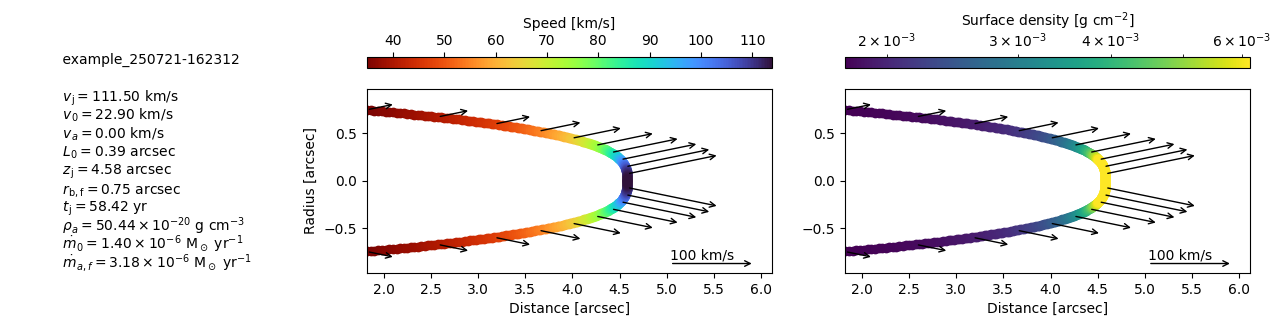

In [5]:
model_plot = model.get_modelplot(
    modelname=modelname,
#    v_arrow_ref=100,
#    figsize=(16,3),
#    textbox_widthratio=0.7,
 )
model_plot.plot()
model_plot.savefig()

In [6]:
model_obs = ObsModel(
    model,
    i=70.0*np.pi/180,
    vsys=0,
    )

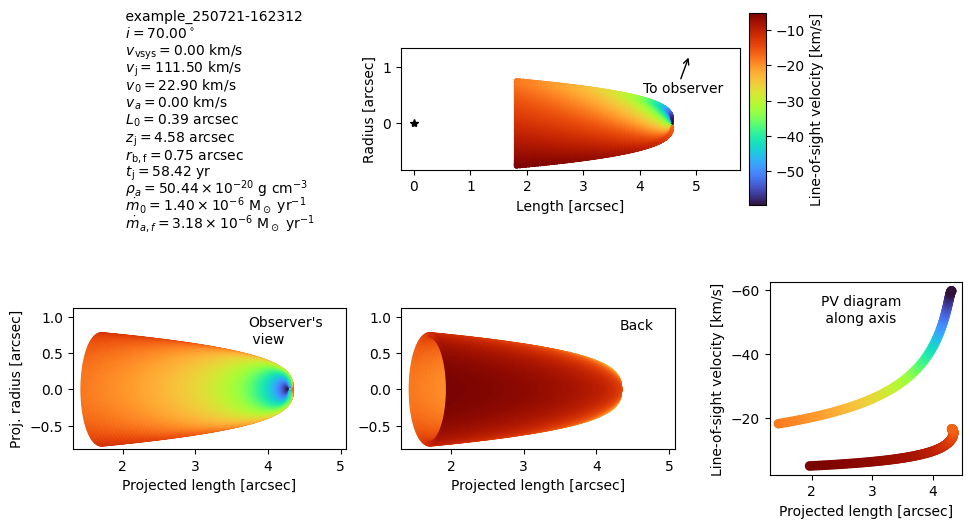

In [7]:
model_obs_plot = model_obs.get_modelplot(
    modelname=modelname,
    figsize=(12, 6),
    maxpointsize=10,
    # minpointsize=0.1,
    )
model_obs_plot.plot()
# Make your custom modifications here
# model_obs_plot.axs[0].set_xlim([0, 5])
model_obs_plot.savefig(figname="models/prueba.jpg", dpi=300)

In [8]:
model_cube = BowshockCube(
    model_obs,
    nphis=400,
    nzs=500,
    nc=50,
    vch0=0, 
    vchf=-64,
    pa=0,
    xpmax=6,    
    nxs=200,
    nys=200, 
    refpix=[100, 20], 
    CIC=True,
    vt="2xchannel",
    tolfactor_vt=5,
    verbose=True,
    )
model_cube.makecube()


Computing masses in the spectral cube...
  0──────────────────────────────────────────────────)100.0% | 40/41s
Checking total mass consistency...
Only 1.7e-03 % of the total mass of the bowshock model is lost due to numerical errors


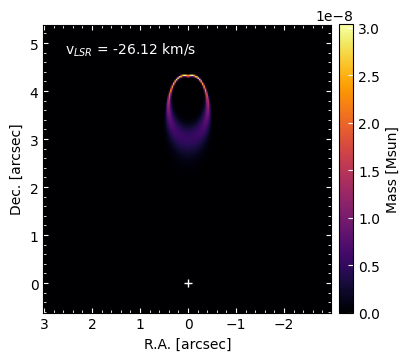

In [9]:
model_cube.plot_channel(chan=20,)

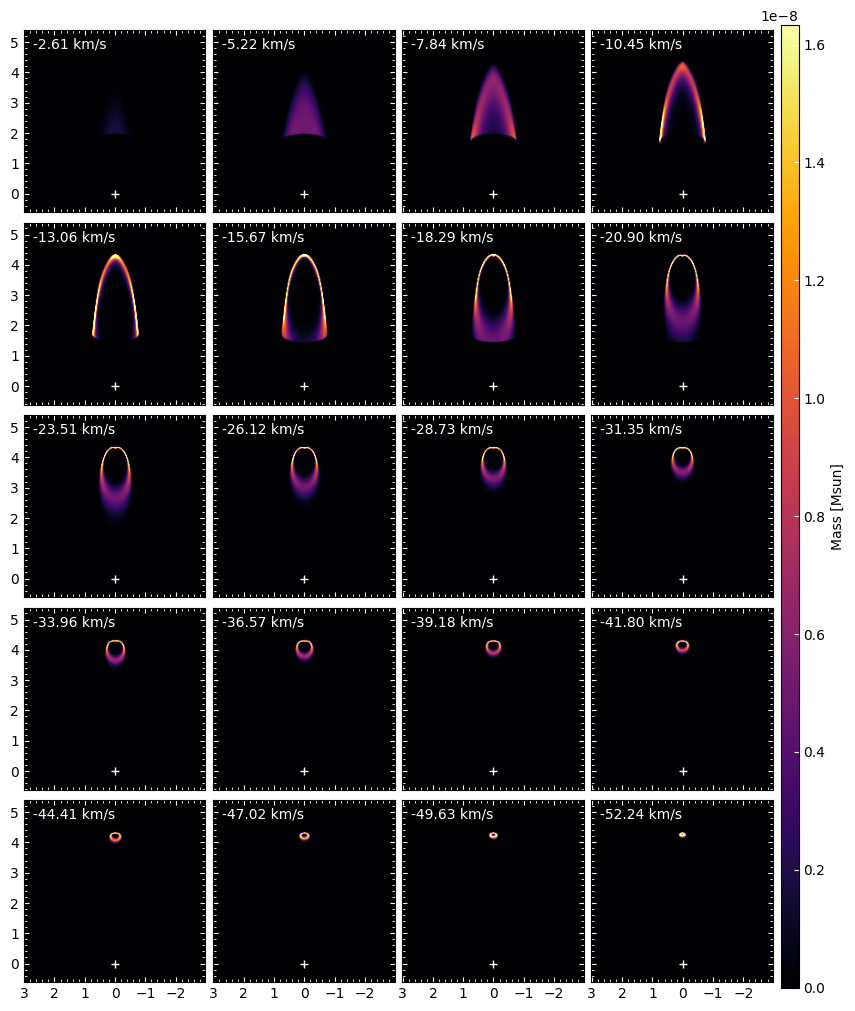

In [10]:
model_cube.plot_channels(
    nrow=5, ncol=4, 
    vmax=np.percentile(model_cube.cube, 99.9),
    savefig="models/prueba2.pdf",
    )

# Model 2

In [11]:
# MODEL 2 DEFINITION
modelname2 =  f"example_{now}"
L0_2 = (0.391 * distpc * u.au).to(u.km).value
zj_2 = (3.5 * distpc * u.au).to(u.km).value 
vj_2 = 100                                    
va_2 = 0                                      
v0_2 = 15.9                                    
mass_2 = 0.0002                               
rbf_obs_2 = (0.6 * distpc * u.au).to(u.km).value
model2 = NarrowJet(
    L0=L0_2,
    zj=zj_2,
    vj=vj_2,
    va=va,
    v0=v0_2,
    mass=mass_2,
    rbf_obs=rbf_obs_2,
    distpc=distpc,
    )
model_obs2 = ObsModel(
    model2,
    i=70.0*np.pi/180,
    vsys=0,
    )

model_cube2 = BowshockCube(
    model_obs2,
    nphis=400,
    nzs=500,
    nc=model_cube.nc,
    vch0=model_cube.vch0,  
    vchf=model_cube.vchf,
    xpmax=model_cube.xpmax,    
    pa=0,#5* np.pi/180,
    nxs=model_cube.nxs,
    nys=model_cube.nys, 
    refpix=model_cube.refpix, 
    CIC=True,
    vt="2xchannel",
    tolfactor_vt=5,
    verbose=True,
    )

In [12]:
model_cube2.makecube()


Computing masses in the spectral cube...
  0──────────────────────────────────────────────────)100.0% | 39/39s
Checking total mass consistency...
Only 8.0e-05 % of the total mass of the bowshock model is lost due to numerical errors


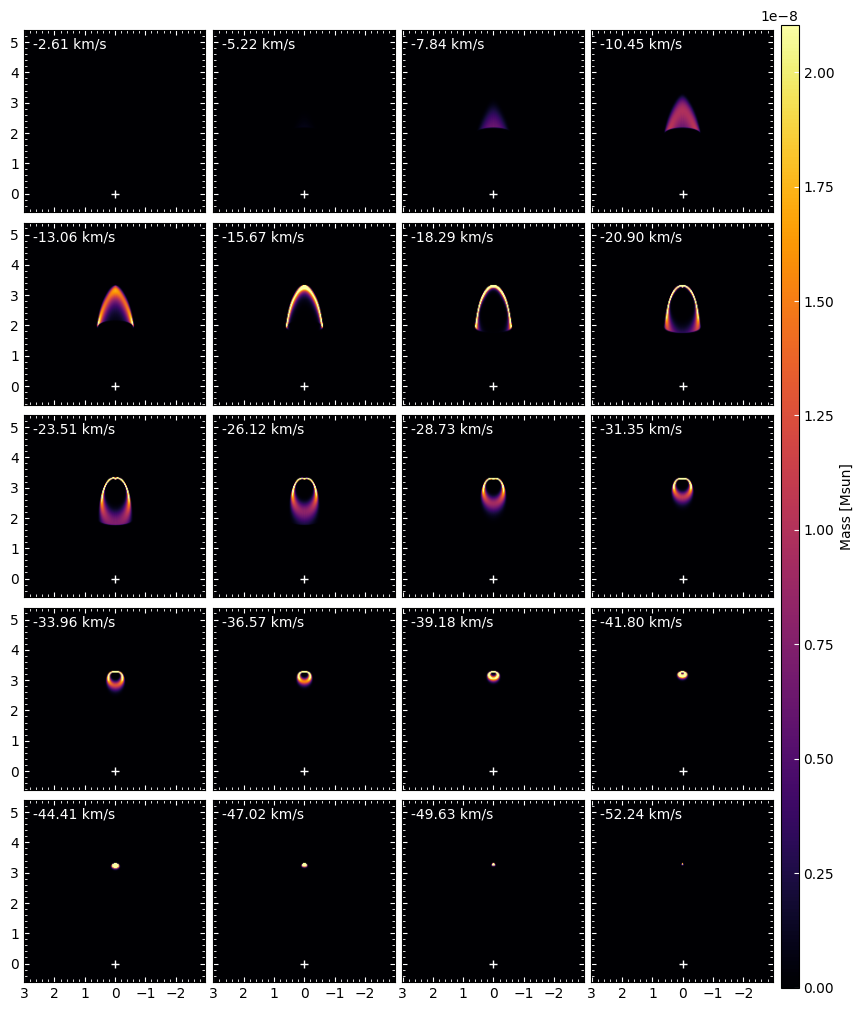

In [13]:
model_cube2.plot_channels(
    nrow=5, ncol=4, 
    vmax=np.percentile(model_cube2.cube, 99.9),
    savefig="models/prueba3.pdf",
    )

In [14]:
cubes_proc = CubeProcessing(
    [model_cube2, model_cube],
    modelname=modelname,
    J="3-2",
    XCO=8.5 * 10**(-5),
    meanmass=2.8 / (6.023*10**23) * u.g,
    Tex=100 * u.K,
    Tbg=2.7 * u.K,
    coordcube="offset",
    # ra_source_deg=mpars["ra_source_deg"],
    # dec_source_deg=mpars["dec_source_deg"],
    bmin=0.15,
    bmaj=0.10,
    pabeam=-20.,
    papv=model_cube.pa,
    parot=0,
    sigma_beforeconv=0.02,
    maxcube2noise=0,
    )



In [15]:
2.8 / (6.023*10**23) * u.g

<Quantity 4.64884609e-24 g>

In [16]:
(2.8 * const.m_p).to(u.g)

<Quantity 4.68334139e-24 g>

In [15]:
cubes_proc.calc_NCO()


Computing CO column densities...
CO column densities has been calculated



In [16]:
np.sum(cubes_proc.cubes["NCO"])

np.float64(8.644042579301875e+20)

In [17]:
np.max(cubes_proc.cubes["NCO"])

np.float64(8.904848311873014e+17)

In [21]:
from bowshockpy import radtrans as rt

In [38]:
def Ntot_opthin_Inudv(nu, J, mu, Tex, Tbg, Inu):
    """
    Column density for the optically thin case.
    """
    return 8 * np.pi * nu**3 * rt.Qpart(nu,J,Tex) * Inu \
    / (rt.A_j_jm1(nu,J,mu) * rt.gJ(J) * const.c**3 * (rt.exp_hnkt(nu, Tex)-1)
       * np.exp(-rt.Ej(nu,J)/(const.k_B*Tex)) * (rt.Bnu_f(nu,Tex)-rt.Bnu_f(nu,Tbg)))

def totmass_opthin(nu, J, mu, Tex, Tbg, Inudv, area, meanmass, abund):
    Ntot = Ntot_opthin_Inudv(nu, J, mu, Tex, Tbg, Inudv)
    totmass = area * Ntot * meanmass / abund
    return totmass.to(u.Msun)



In [39]:
cubes_proc.calc_Ithin()


Computing opacities...
Opacities has been calculated


Computing intensities...
Intensities has been calculated



In [ ]:
sumintens = np.sum(cubes_proc.cubes["Ithin"])
# Ntot_opthin_Inudv(
#     nu=rt.freq_caract_CO["3-2"],
#     J=3,
#     mu=0.112*u.D,
#     Tex=100*u.K,
#     Tbg=2.7*u.K,
#     Inu=sumintens*u.Jy/cubes_proc.beamarea_sr*cubes_proc.abschanwidth*u.km/u.s,
# ).to(u.cm**(-2))

totmass_opthin = totmass_opthin(
    nu=rt.freq_caract_CO["3-2"],
    J=3,
    mu=0.112*u.D,
    Tex=100*u.K,
    Tbg=2.7*u.K,
    Inudv=sumintens*u.Jy/cubes_proc.beamarea_sr*cubes_proc.abschanwidth*u.km/u.s,
    area=cubes_proc.areapix_cm,
    meanmass=cubes_proc.meanmass,
    abund=cubes_proc.XCO,
).to(u.Msun).value

In [ ]:
assert np.isclose(np.sum(cubes_proc.cube), totmass_opthin), "Intensities calculated in the optically thin regime does not correspond to total mass of the cube"

In [18]:
cubes_proc.calc_Ntot()


Computing column densities...
column densities has been calculated



In [16]:
np.sum(cubes_proc.cubes["NCO"])

np.float64(8.644042579301875e+20)

In [ ]:
np.max(cubes_proc.cubes["NCO"])

np.float64(8.904848311873014e+17)

In [16]:
np.sum(cubes_proc.cubes["NCO"])

np.float64(8.644042579301875e+20)

In [17]:
np.max(cubes_proc.cubes["NCO"])

np.float64(8.904848311873014e+17)

In [18]:
np.sum(cubes_proc.cube)

np.float64(0.00043099583425657765)

In [134]:
type(4*u.m)

astropy.units.quantity.Quantity

In [ ]:
import radtrans as rt 
bscp = cubes_proc

NCO = ((np.sum(cubes_proc.cube)) * u.solMass * bscp.XCO \
            / bscp.meanmass / bscp.areapix_cm
        ).to(u.cm**(-2)).value #* self.NCOfactor
dNdv = NCO *u.cm**(-2) / (bscp.abschanwidth*u.km/u.s)
tau = rt.tau_N(
            nu=rt.freq_caract_CO[bscp.J],
            J=float(bscp.J[0]),
            mu=0.112*u.D,
            Tex=bscp.Tex,
            dNdv=dNdv,
).to("").value

intens = (rt.Inu_tau_thin(
            nu=rt.freq_caract_CO[bscp.J],
            Tex=bscp.Tex,
            Tbg=bscp.Tbg,
            tau=tau,
) * bscp.beamarea_sr).to(u.Jy).value

In [128]:
int_flux = np.sum(bscp.cubes["Ithin"]/bscp.beamarea)


In [129]:
int_flux

np.float64(78.78930602827627)

In [ ]:
totmass = rt.totalmass(
    nu=rt.freq_caract_CO[bscp.J],
    J=3,
    mu=0.112*u.D,
    Tex=bscp.Tex,
    Tbg=bscp.Tbg,
    Iint=int_flux*u.Jy * bscp.abschanwidth * u.km/u.s,
    dist=300*u.pc,
    abund=8.5*10**(-5),
    total_mass=True,
    meanmolweight=2.8
)

In [131]:
totmass.to(u.Msun)

<Quantity 0.000431 solMass>

In [90]:
bscp.calc_Ithin()


Computing intensities...
Intensities has been calculated



In [ ]:
totmass = rt.totalmass(
    nu=rt.freq_caract_CO[bscp.J],
    J=3,
    mu=0.112*u.D,
    Tex=bscp.Tex,
    Tbg=bscp.Tbg,
    Iint=np.sum(intens/bscp.beamarea)*u.Jy * u.km/u.s,
    dist=300*u.pc,
    abund=8.5*10**(-5),
    total_mass=True,
    meanmolweight=2.8
)

In [116]:
totmass.to(u.solMass) * bscp.abschanwidth

<Quantity 0.000431 solMass>

In [106]:
bscp.calc_Ithin()
bscp.convolve("Ithin")
np.sum(bscp.cubes["Ithin"]/bscp.beamarea)


Computing intensities...
Intensities has been calculated


Convolving Ithin_c... 
  0──────────────────────────────────────────────────)100.0% | 1/1s

Ithin_c has been convolved with a gaussian kernel with a size of [5.00, 3.33] pix and with a PA of -20.00deg


The rms of the convolved image is 0.0 Jy/beam



np.float64(78.78930602827627)

In [117]:
np.sum(bscp.cubes["Ithin_c"]/bscp.beamarea)

np.float64(78.78930602827623)

In [118]:
np.sum(cubes_proc.cube) 

np.float64(0.00043099583425657765)

In [ ]:
bscp = cubes_proc
dNdv = ((model_cube.mass+model_cube2.mass) * u.solMass * cubes_proc.XCO \
            / cubes_proc.meanmass / cubes_proc.areapix_cm
        ).to(u.cm**(-2)).value #* self.NCOfactor
 
tau = rt.tau_N(
            nu=rt.freq_caract_CO[bscp.J],
            J=float(bscp.J[0]),
            mu=0.112*u.D,
            Tex=bscp.Tex,
            dNdv=dNdv,
)
(rt.Inu_tau(
            nu=rt.freq_caract_CO[bscp.J],
            Tex=bscp.Tex,
            Tbg=bscp.Tbg,
            tau=tau,
) * bscp.beamarea_sr).to(u.Jy).value

Object `comass.dNdv` not found.


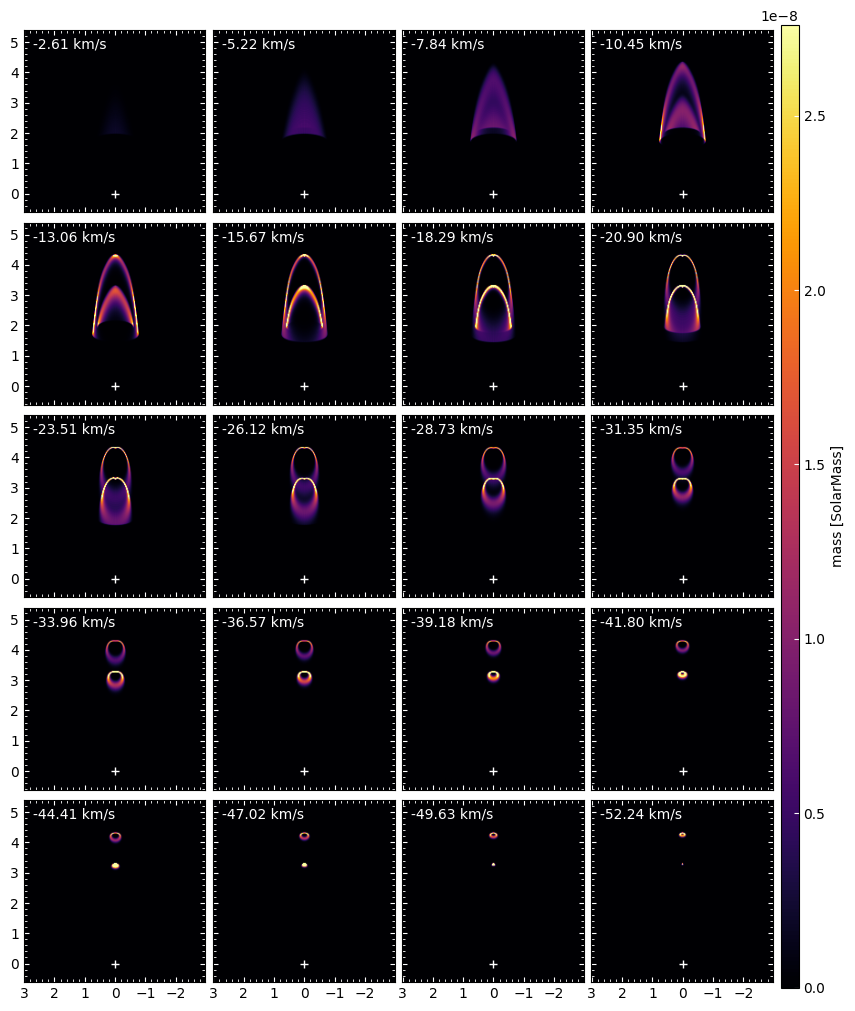

In [23]:
cubes_proc.plot_channels(
    ck="m",
    vmax=np.percentile(cubes_proc.cubes["m"], 99.9),
    nrow=5, ncol=4, 
    )

## Compute CO column densties, opacities, and intensities

### Compute CO column densities

In [24]:
cubes_proc.calc_NCO()


Computing column densities...
CO column densities has been calculated



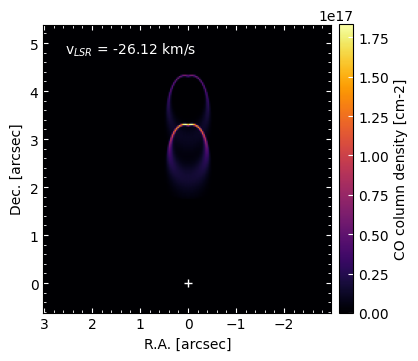

In [84]:
cubes_proc.plot_channel(ck="NCO", chan=20)

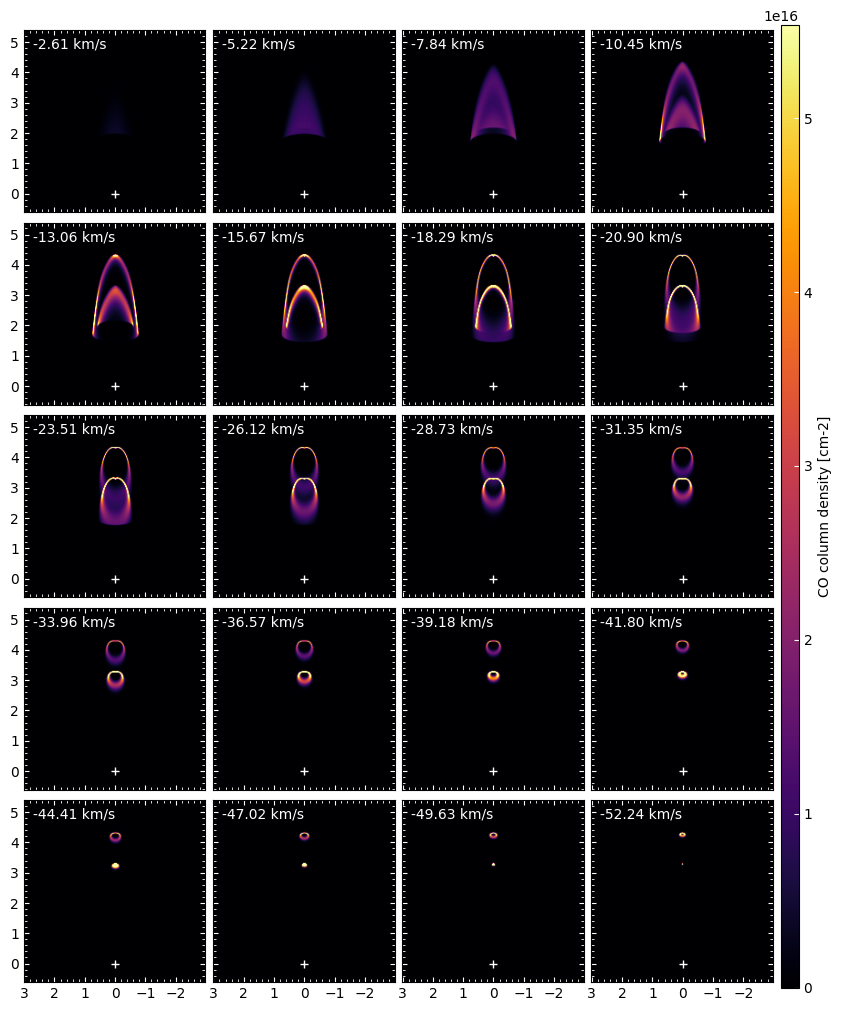

In [25]:
cubes_proc.plot_channels(
    ck="NCO",
    vmax=np.percentile(cubes_proc.cubes["NCO"], 99.9),
    nrow=5, ncol=4, 
    )

### Compute opacities

In [26]:
cubes_proc.calc_tau()


Computing opacities...
Opacities has been calculated



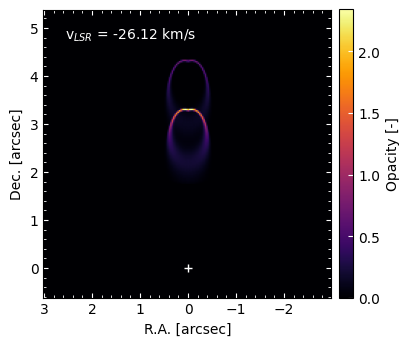

In [83]:
cubes_proc.plot_channel(ck="tau", chan=20)

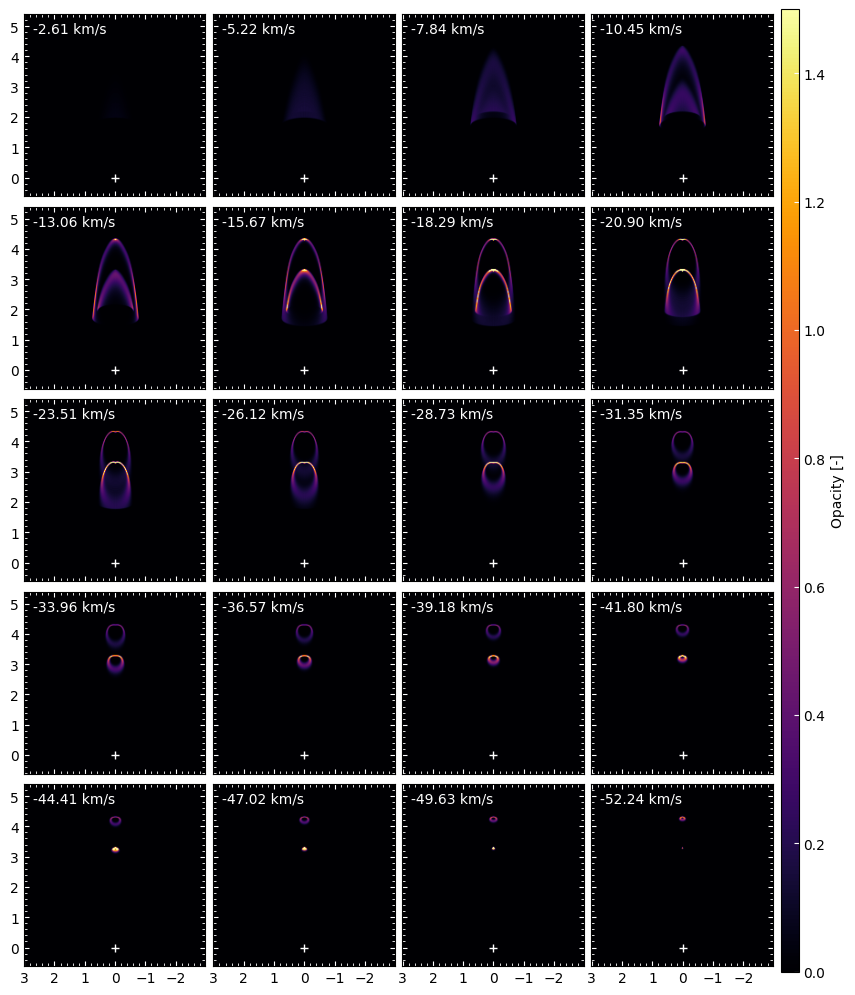

In [27]:
cubes_proc.plot_channels(
    ck="tau",
    vmax=1.5,
    nrow=5, ncol=4, 
    )

### Compute intensities

In [28]:
cubes_proc.calc_I()


Computing intensities...
Intensities has been calculated



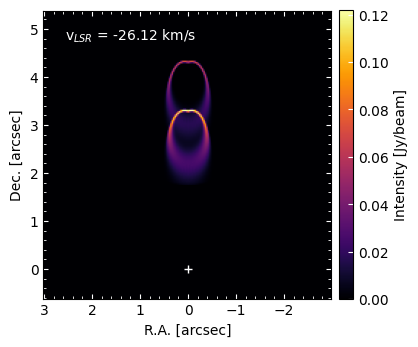

In [82]:
cubes_proc.plot_channel(ck="I", chan=20)

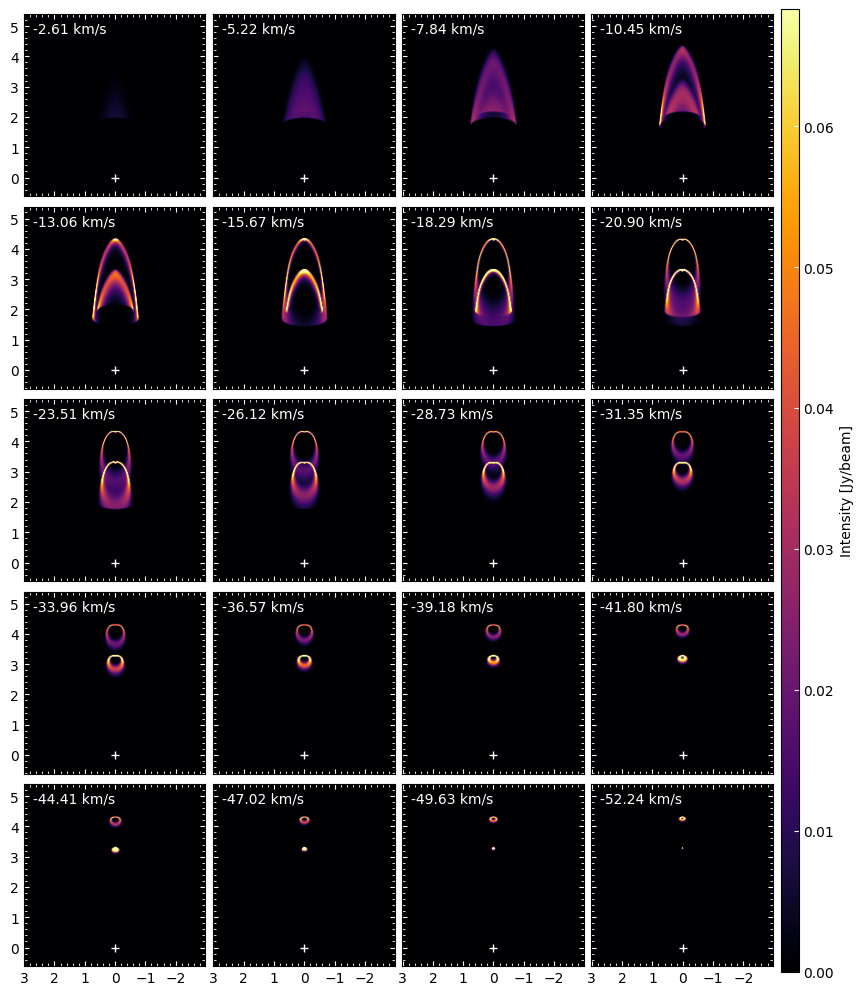

In [29]:
cubes_proc.plot_channels(
    ck="I",
    vmax=np.percentile(cubes_proc.cubes["I"], 99.9),
    nrow=5, ncol=4, 
    )

## Perform operations

### Convolve

In [30]:
cubes_proc.convolve(ck="I")


Convolving I_c... 
  0──────────────────────────────────────────────────)100.0% | 1/1s

I_c has been convolved with a gaussian kernel with a size of [5.00, 3.33] pix and with a PA of -20.00deg



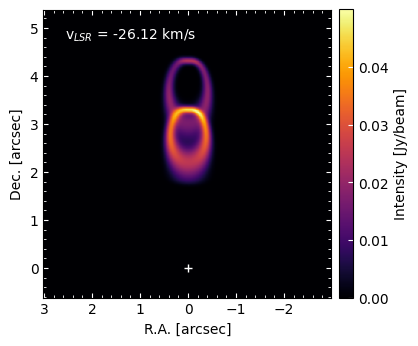

In [81]:
cubes_proc.plot_channel(ck="I_c", chan=20)

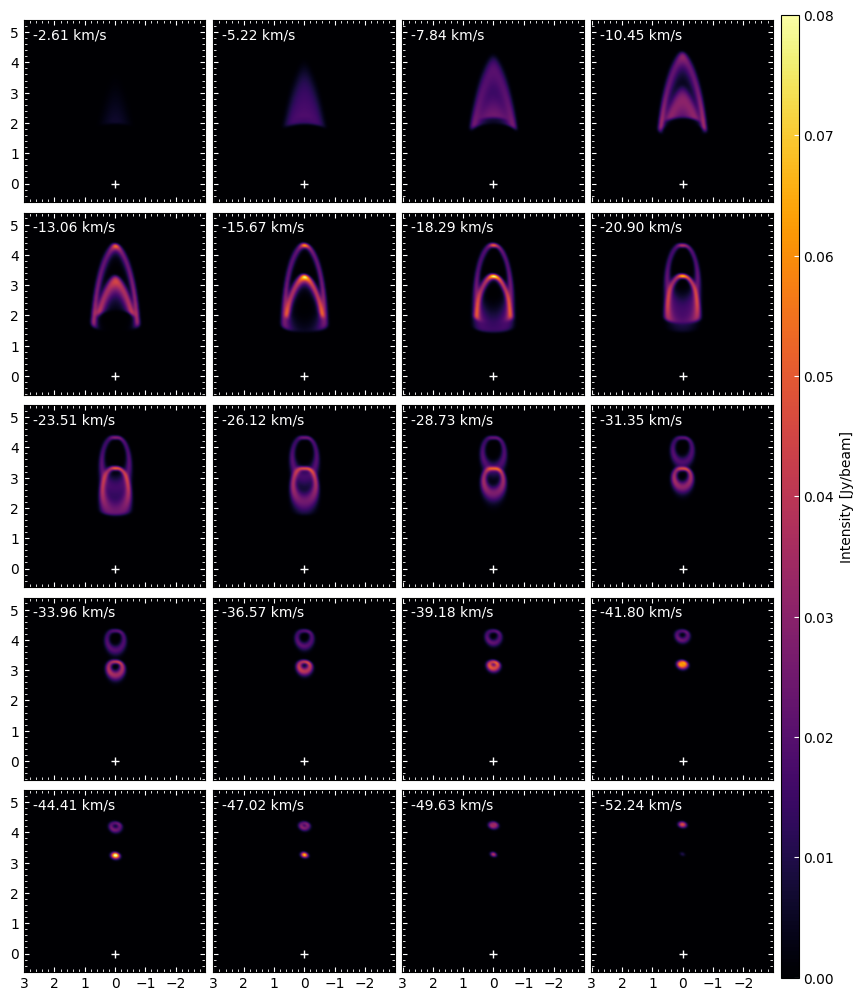

In [31]:
cubes_proc.plot_channels(
    ck="I_c",
    nrow=5, ncol=4, 
    vmax=0.08,
    )

### Add noise and convolve

In [32]:
cubes_proc.add_noise(ck="I")
cubes_proc.convolve(ck="I_n")


Adding noise to I_n...
Noise added to I_n


Convolving I_nc... 
  0──────────────────────────────────────────────────)100.0% | 1/1s

I_nc has been convolved with a gaussian kernel with a size of [5.00, 3.33] pix and with a PA of -20.00deg


The rms of the convolved image is 0.0032022 Jy/beam



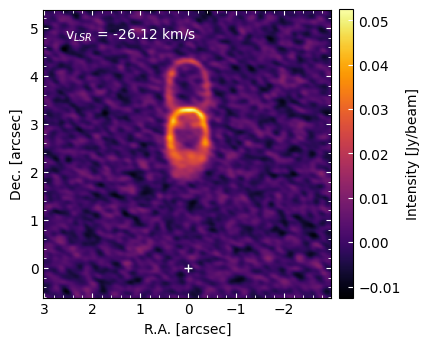

In [79]:
cubes_proc.plot_channel(ck="I_nc", chan=20)

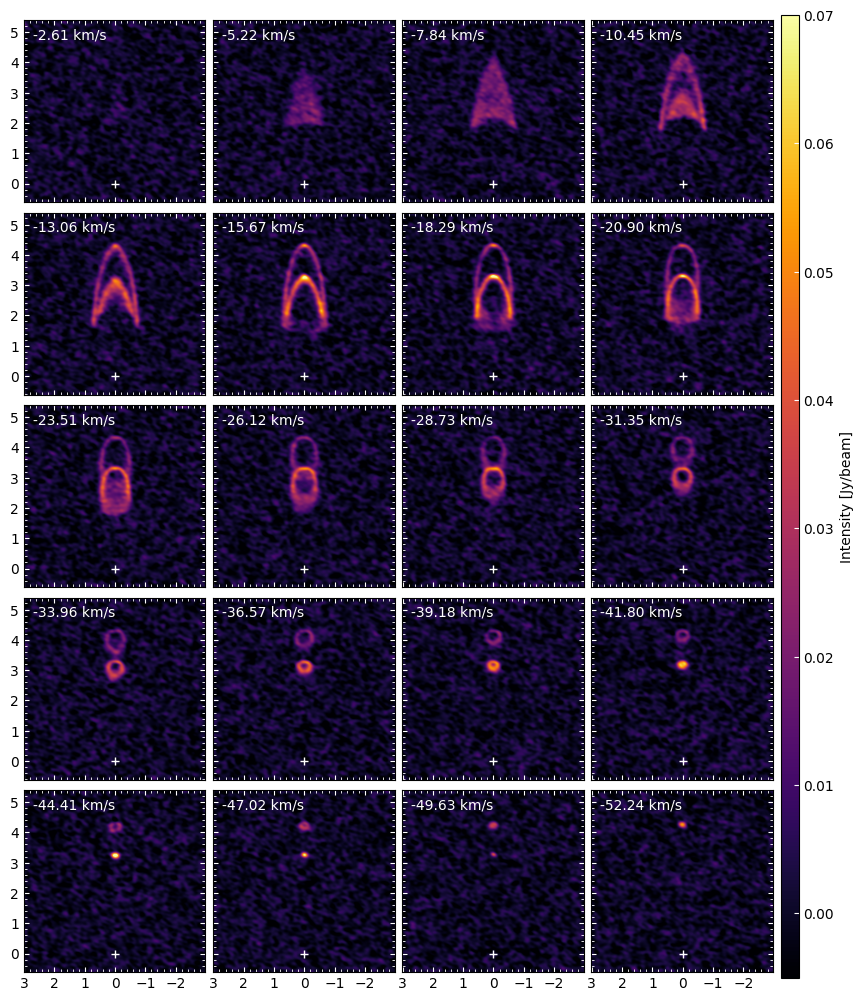

In [33]:
cubes_proc.plot_channels(
    ck="I_nc",
    nrow=5, ncol=4, 
    vmin=-0.005, vcenter=(0.07-0.005)/2, vmax=0.07,
    )

### Position Velocity digram

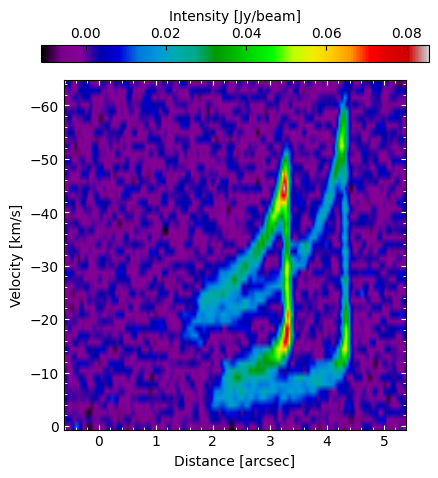

In [ ]:
ck = "I_nc"
cubes_proc.plotpv(
    "I_nc", halfwidth=1,
    )

### Moments

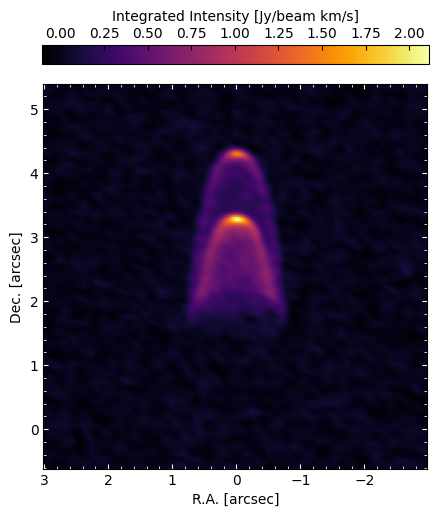

In [43]:
ck = "I_nc"
cubes_proc.plotmom0( ck,)


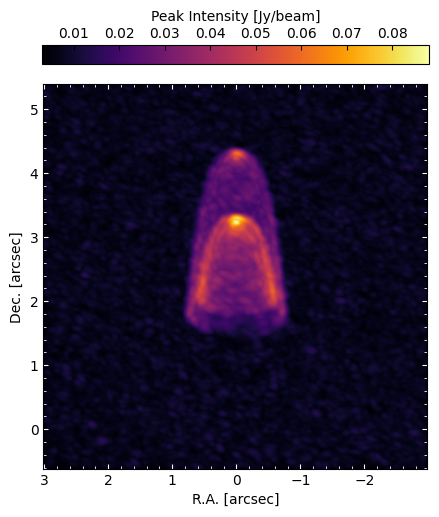

In [65]:
ck = "I_nc"
cubes_proc.plotmom8( ck,)


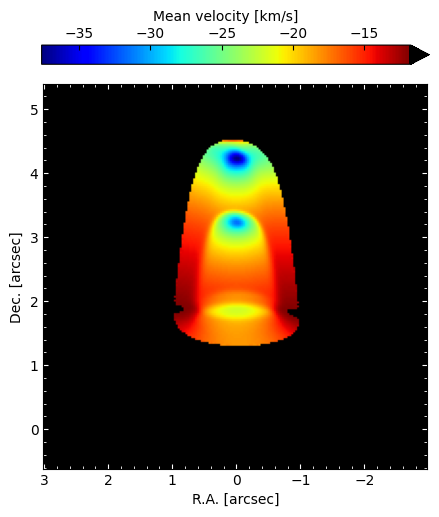

In [68]:
ck = "I_c"
cubes_proc.plotmom1(ck, )

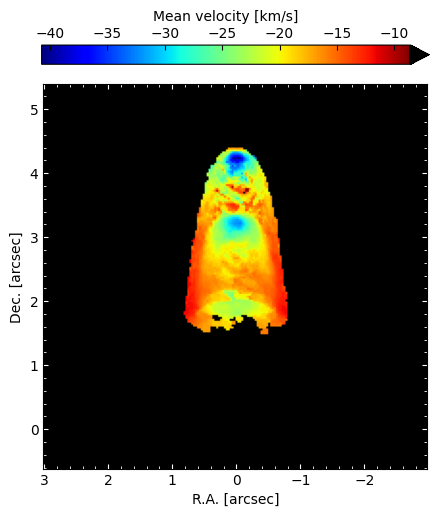

In [61]:
ck = "I_nc"
cubes_proc.plotmom1(ck, mom1clipping="5xsigma")


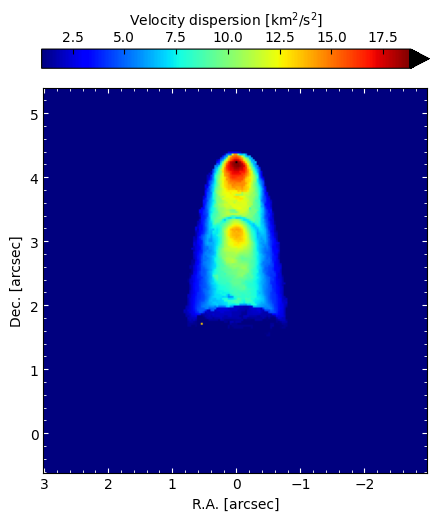

In [64]:
ck = "I_nc"
cubes_proc.plotmom2(ck, mom2clipping="4xsigma")


# Do all the computation at once

In [66]:

outcubes = {
    "intensity": ["add_noise", "convolve", "moments_and_pv"],
    "opacity": [],
    "CO_column_density": [],
    "mass": [],
    }

cubes_proc.calc(outcubes)
cubes_proc.savecubes(outcubes)


models/example_250718-180807/fits/I_nc.fits saved
models/example_250718-180807/fits/tau.fits saved
models/example_250718-180807/fits/NCO.fits saved
models/example_250718-180807/fits/m.fits saved


In [24]:
print(f"Abbreviations for quantities:\n {CubeProcessing.btypes}")
print(f"Abbreviations for operations:\n {CubeProcessing.dos}")


Abbreviations for quantities:
 {'m': 'mass', 'I': 'Intensity', 'Ithin': 'Intensity', 'NCO': 'CO column density', 'tau': 'Opacity'}
Abbreviations for operations:
 {'s': 'add_source', 'r': 'rotate', 'n': 'add_noise', 'c': 'convolve'}


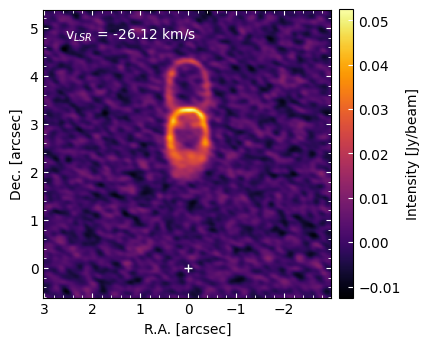

In [67]:
cubes_proc.plot_channel(ck="I_nc", chan=20)



Computing moments and the PV-diagram along the jet axis



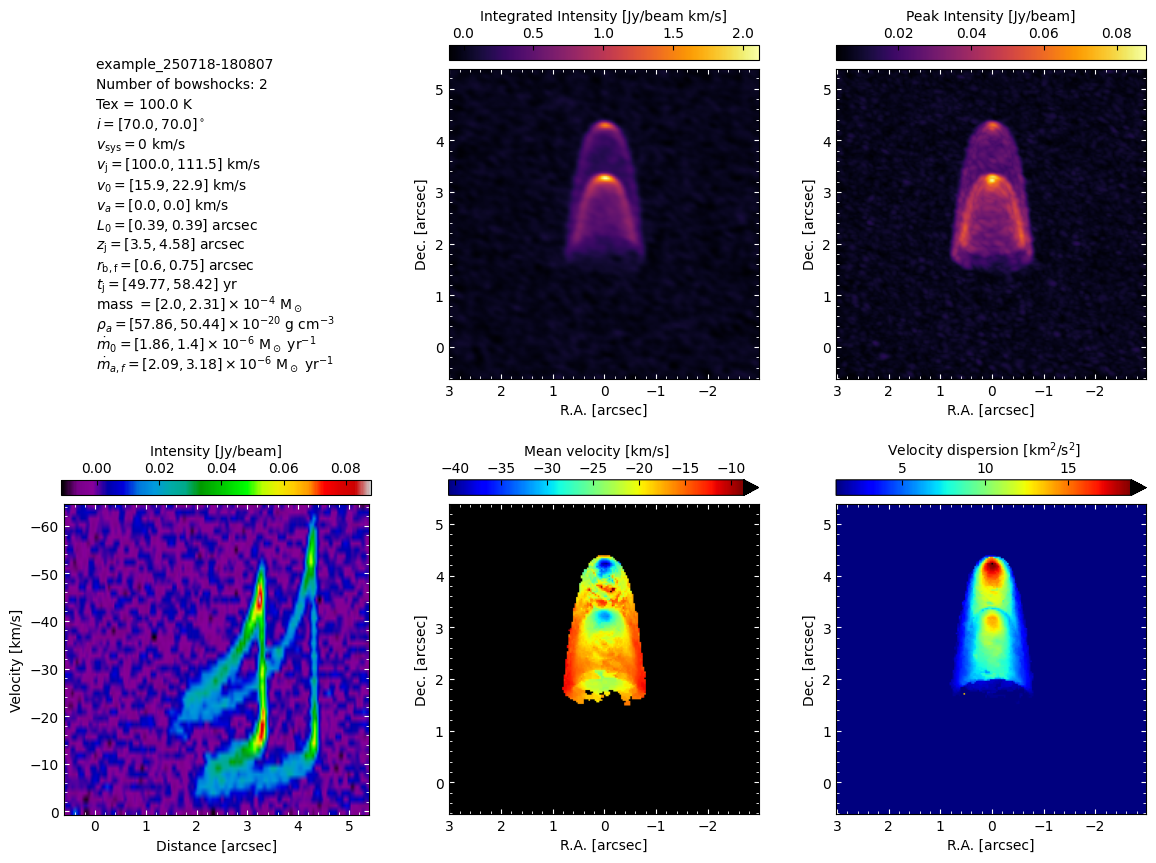

In [70]:
cubes_proc.momentsandpv_and_params("I_nc", mom1clipping="5xsigma", mom2clipping="4xsigma")